In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import misc
import os,csv
from PIL import Image

um_per_pixel = 3.45

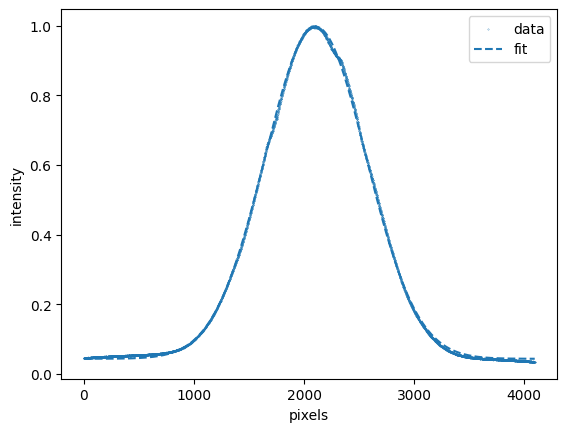

x waist = 3175.37 microns


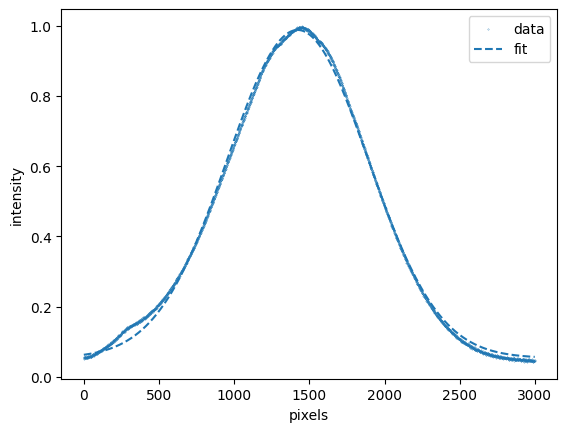

y waist = 3226.96 microns


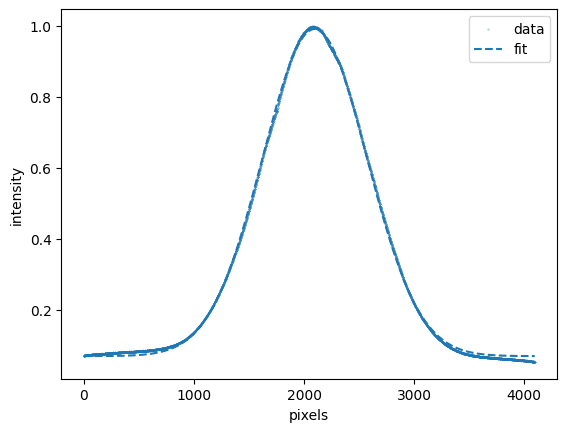

x waist = 3271.29 microns


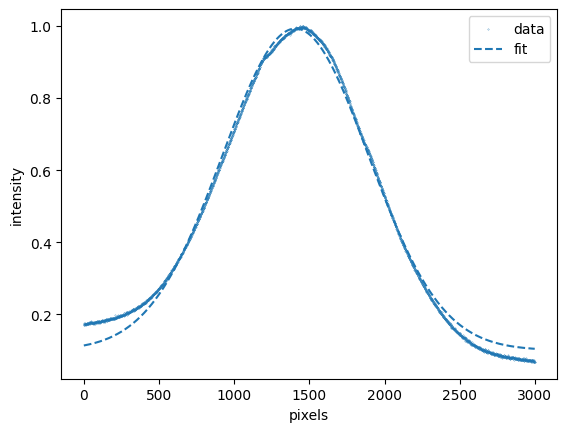

y waist = 3346.88 microns


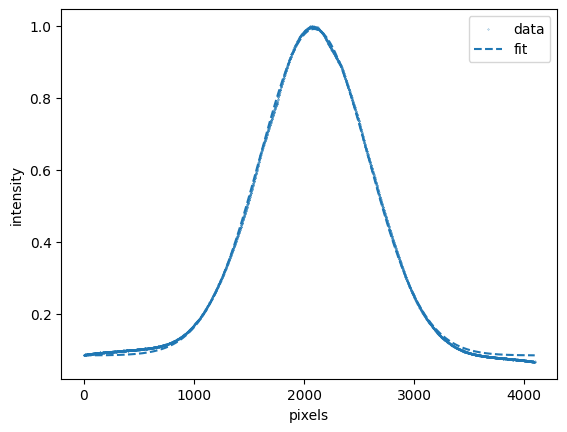

x waist = 3400.48 microns


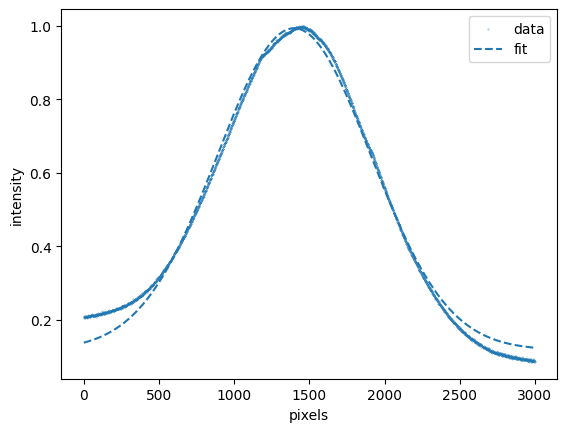

y waist = 3512.74 microns


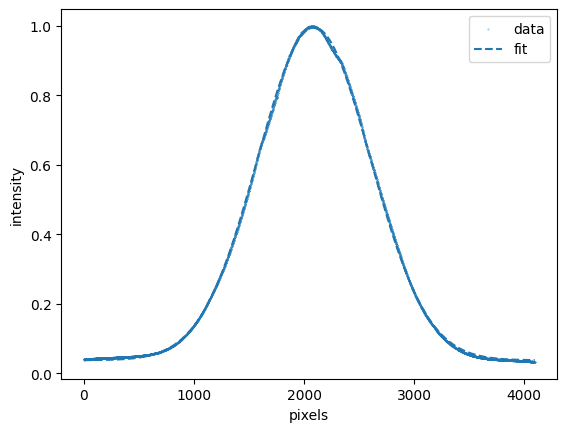

x waist = 3530.82 microns


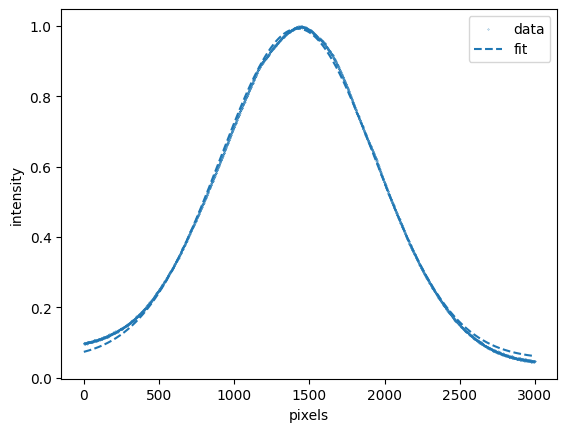

y waist = 3554.43 microns


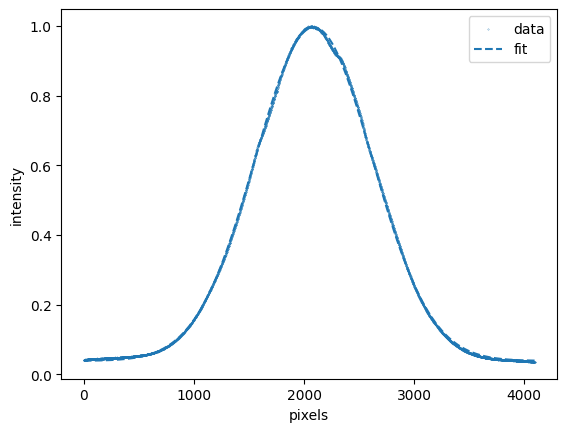

x waist = 3664.65 microns


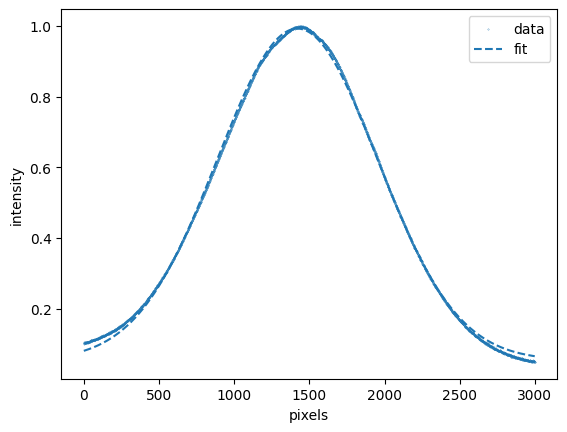

y waist = 3672.72 microns


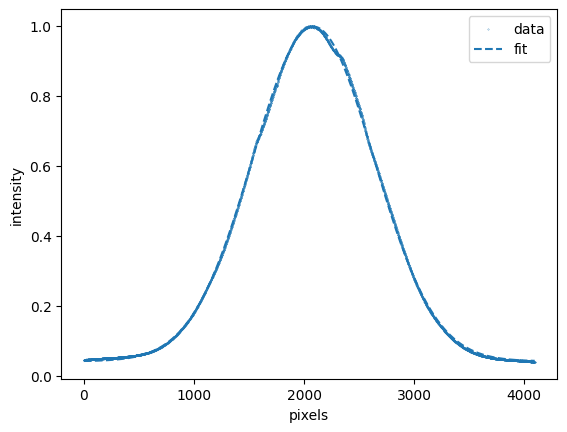

x waist = 3797.50 microns


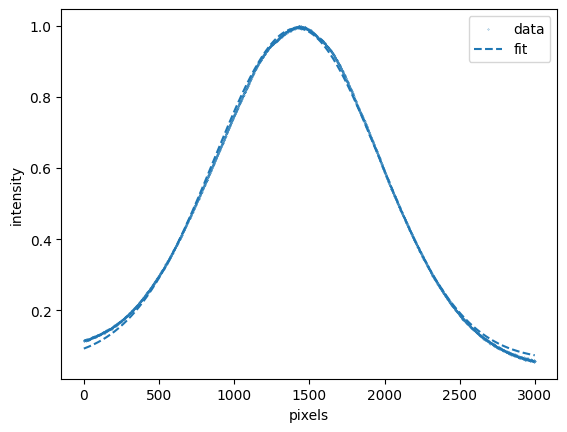

y waist = 3793.66 microns


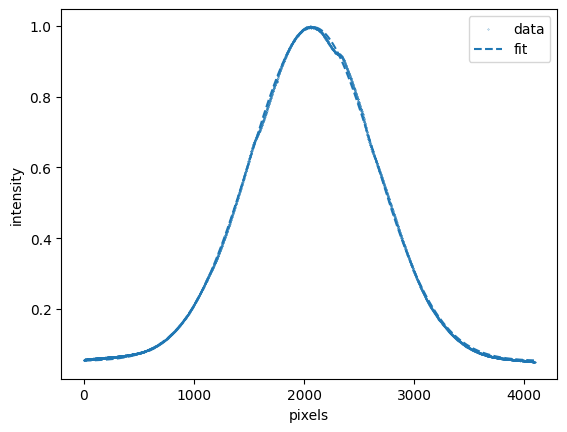

x waist = 3926.85 microns


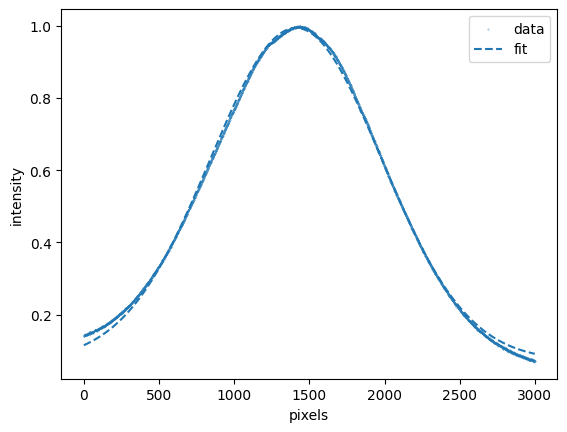

y waist = 3926.48 microns


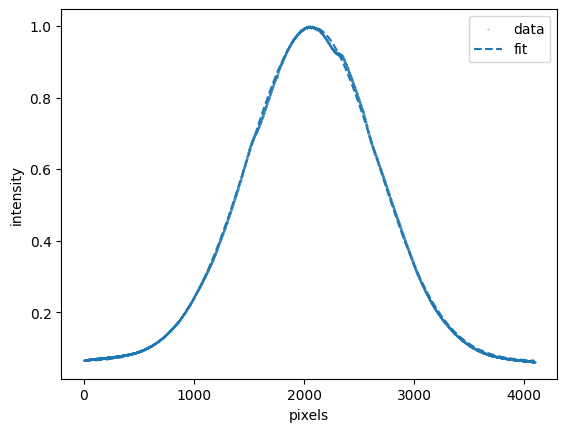

x waist = 4057.77 microns


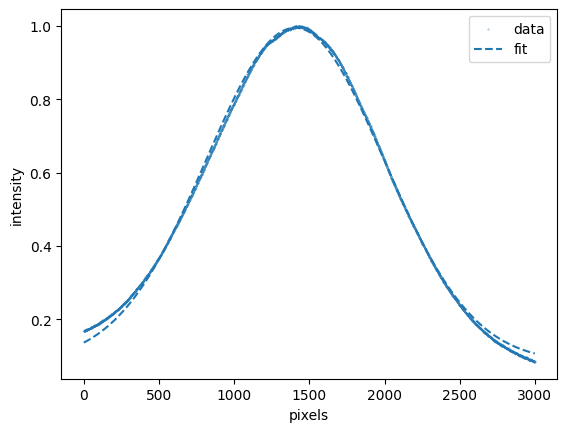

y waist = 4070.06 microns


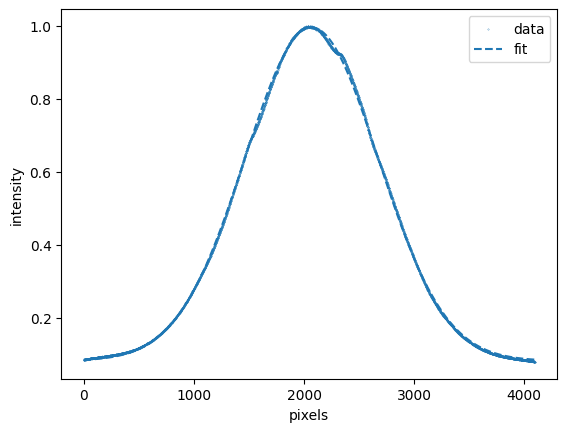

x waist = 4181.73 microns


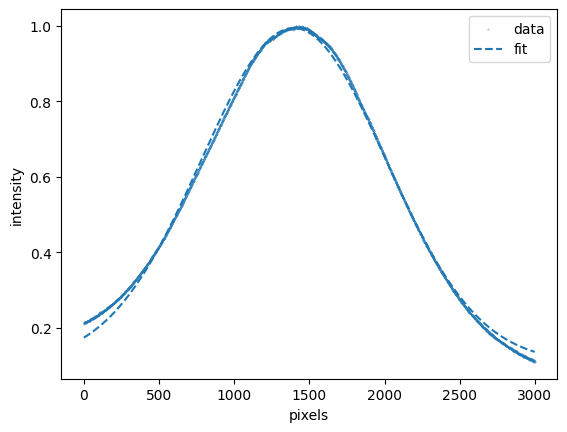

y waist = 4233.04 microns


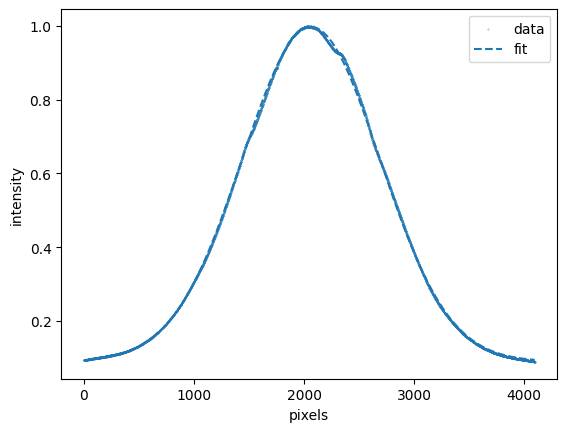

x waist = 4309.59 microns


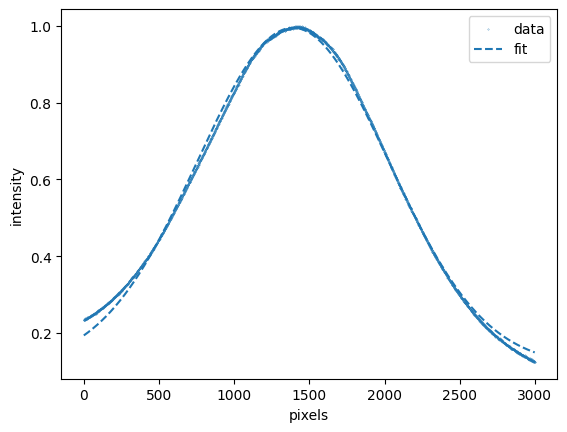

y waist = 4380.73 microns


In [56]:
files = [f'{i}mm.bmp' for i in range(10)]

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','LMA-PM-15 NA measurements',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [57]:
[float(x) for x in xwaists]

[3175.3670455068936,
 3271.2917534466333,
 3400.47906158792,
 3530.8183284114007,
 3664.6530039758677,
 3797.5008616919285,
 3926.8538859059304,
 4057.7692141964867,
 4181.731770463938,
 4309.585323840279]

In [58]:
[float(y) for y in xwaists]

[3175.3670455068936,
 3271.2917534466333,
 3400.47906158792,
 3530.8183284114007,
 3664.6530039758677,
 3797.5008616919285,
 3926.8538859059304,
 4057.7692141964867,
 4181.731770463938,
 4309.585323840279]

In [59]:
xwaists[1] - xwaists[0]

np.float64(95.92470793973962)

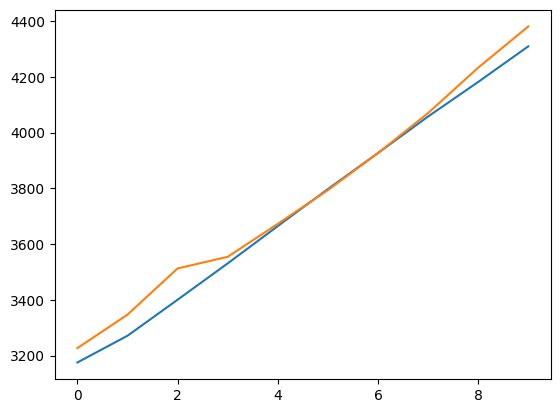

In [60]:
mm_pts = range(10)
plt.plot(mm_pts, xwaists)
plt.plot(mm_pts, ywaists)

In [62]:
(4300 - 3200)/9

122.22222222222223